# Optimization problem with bound constraints

In [1]:
using Optim, Plots

In [2]:
# Objective function
f(x) = x * sin(x)

# Design variable bounds
xmin, xmax = 2., 6.;

## Constrained Optimization

In [3]:
# Constrained optimization
function constrainedOptimization(f, xmin, xmax)
    
    res = optimize(f, xmin, xmax)
    
    conv = Optim.converged(res);  println("converged? ", conv)
    xopt = Optim.minimizer(res);  println("     xOpt: ", xopt)
    fmin = Optim.minimum(res);    println("     fMin: ", fmin)
    
    xopt, fmin
end;

converged? true
   # iter: 10
     xOpt: 4.913180438706312
     fMin: -4.814469889712268


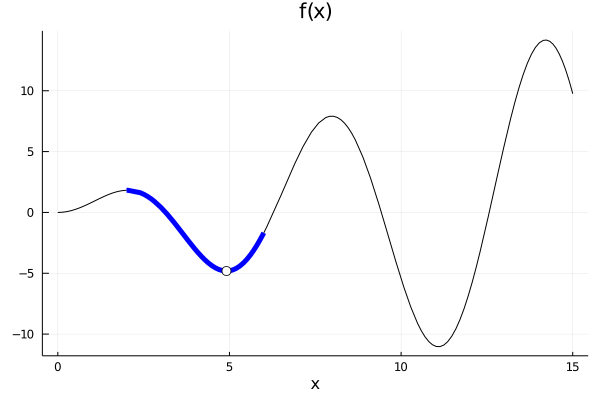

In [4]:
# Perform constrained optimization
xopt, fmin = constrainedOptimization(f, xmin, xmax)

# plot
plot(f, 0, xmin, color=:black, title="f(x)", xlabel="x", legend=false)
plot!(f, xmin, xmax, color=:blue, linewidth=5)
plot!(f, xmax, 15, color=:black)
scatter!([xopt], [fmin], color=:white, markersize=5)

## Unconstrained Optimization (transformed problem)

In [5]:
# Transformation
 x(y) = @. (xmin + xmax) / 2 + (xmax - xmin) * y / (1 + y^2)
fy(y) = f(x(y))

# Unconstrained optimization: transformed problem
function unconstrainedOptimization(fy, y0, method=LBFGS())
    
    println("\ninitial guess: ", y0)
    res = optimize(y->fy(first(y)), [y0], method)
    
    conv = Optim.converged(res);  println("converged? ",       conv)
    yopt = Optim.minimizer(res);  println("     yOpt: ",    yopt[1])
                                  println("     xOpt: ", x(yopt[1]))
    fmin = Optim.minimum(res);    println("     fMin: ",       fmin)
    
    yopt, fmin
end; 


initial guess: 0.0
converged? true
     yOpt: 4.138671948497414
     xOpt: 4.913180431692558
     fMin: -4.814469889712268

initial guess: 0.5
converged? true
     yOpt: 0.24162340533417573
     xOpt: 4.913180439619471
     fMin: -4.814469889712269


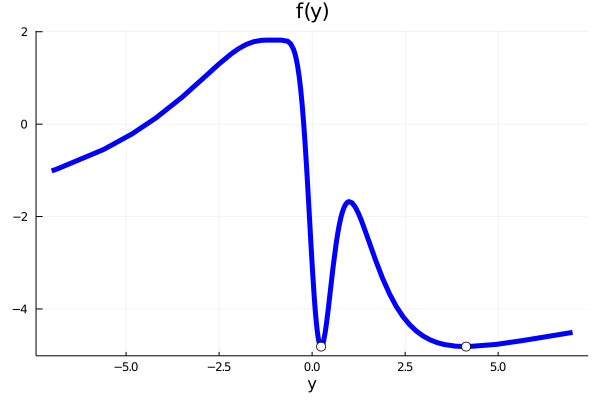

In [6]:
# Perform constrained optimization

# different initial guesses
yopt_a, fmin_a = unconstrainedOptimization(fy, 0.)
yopt_b, fmin_b = unconstrainedOptimization(fy, 0.5)

# plot
plot(fy, -7, 7, color=:blue, linewidth=5, title="f(y)", xlabel="y", legend=false)
scatter!([yopt_a], [fmin_a], color=:white, markersize=5)
scatter!([yopt_b], [fmin_b], color=:white, markersize=5)